
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


Description: This notebook is useful for examining potfolios comprised of investments options from the dow30 and alabama.  Construct portfolios from the Investment Options in the dow30+alabama and examine the results of different weighting schemes.


In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# display all rows
pd.set_option('display.max_rows', None)

# do not truncate column names
pd.set_option('display.max_colwidth', None)

%matplotlib inline

In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['dow30-galaxy', 'alabama-galaxy']
risk_free_rate = 0
annual_returns = '5 Yr'

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, risk_free_rate, annual_returns)
df

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
0,MMM,3M Company,US Stocks:Industrials,-48.87,-1.30,20.83,-7.52,4.98,20.92,16.62,22.57,4.98,0.22
1,AXP,American Express,US Stocks:Financials,671.01,61.58,22.05,11.72,21.50,27.06,11.81,30.32,21.50,0.71
2,AMGN,Amgen,US Stocks:Healthcare,-70.78,11.60,13.62,9.15,12.01,14.95,11.33,24.11,12.01,0.50
3,AAPL,Apple Inc.,US Stocks:Technology,-84.77,23.63,78.71,41.10,40.06,24.03,18.76,34.12,40.06,1.17
4,BA,Boeing,US Stocks:Industrials,189.63,-11.35,-26.32,-15.24,14.93,46.87,22.46,49.53,14.93,0.30
5,CAT,Caterpillar Inc.,US Stocks:Industrials,749.32,126.55,80.10,12.64,30.23,29.33,10.01,27.98,30.23,1.08
6,CVX,Chevron Corporation,US Stocks:Energy,433.98,26.53,12.53,0.02,7.80,29.78,16.46,33.72,7.80,0.23
7,CSCO,Cisco Systems,US Stocks:Technology,-19.74,27.00,16.00,2.75,14.66,22.51,11.87,26.19,14.66,0.56
8,KO,The Coca-Cola Company,US Stocks:Consumer Staples,11.99,-25.92,-7.76,7.09,5.50,16.94,10.98,18.49,5.50,0.30
9,GS,Goldman Sachs,US Stocks:Financials,550.24,234.63,59.06,7.66,18.62,25.76,10.21,34.54,18.62,0.54


In [6]:
# rank
rank = bb.rank(df, rank_by='Sharpe Ratio')
rank_filtered = rank
#rank_filtered = rank.loc[(rank['3 mo'] > 0) & rank['1 Yr'] > 0]
rank_filtered

,Investment Option,Description,Asset Class,1 mo,3 mo,1 Yr,3 Yr,5 Yr,Vola,DS Vola,Std Dev,Annual Returns,Sharpe Ratio
18,MSFT,Microsoft,US Stocks:Technology,0.08,40.69,48.40,36.35,37.21,22.42,14.76,18.39,37.21,2.02
3,AAPL,Apple Inc.,US Stocks:Technology,-84.77,23.63,78.71,41.10,40.06,24.03,18.76,34.12,40.06,1.17
5,CAT,Caterpillar Inc.,US Stocks:Industrials,749.32,126.55,80.10,12.64,30.23,29.33,10.01,27.98,30.23,1.08
25,V,Visa Inc.,US Stocks:Financials,184.50,5.93,18.73,20.22,24.55,29.44,13.35,23.25,24.55,1.06
23,UNH,UnitedHealth Group,US Stocks:Healthcare,-2.74,-3.05,32.99,14.14,24.29,17.97,11.60,23.38,24.29,1.04
27,WMT,Walmart,US Stocks:Consumer Discretionary,-70.52,-44.92,19.65,14.00,16.44,27.45,23.42,16.16,16.44,1.02
15,JPM,JPMorgan Chase,US Stocks:Financials,440.77,108.74,25.76,10.72,24.35,21.60,10.40,27.98,24.35,0.87
10,HD,The Home Depot,US Stocks:Consumer Discretionary,-50.76,-18.42,17.67,13.80,18.00,22.75,16.14,22.20,18.00,0.81
16,MCD,McDonald's,US Stocks:Consumer Staples,2.39,-18.68,5.76,10.92,14.80,14.64,8.10,18.69,14.80,0.79
21,CRM,Salesforce,US Stocks:Technology,-36.26,-52.54,25.76,22.89,25.54,34.64,25.52,32.75,25.54,0.78


### Sample Portfolios
Format 'Investment option': weight

In [7]:
# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank_filtered['Investment Option'])[:20]
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

# top 10
top10_portfolio = {
    'Title': 'Top10 Portfolio'
}
top10 = list(rank['Investment Option'])[:10]
top10_portfolio.update(dict.fromkeys(top10, 1/len(top10)))

### Custom Portfolios

In [8]:
# My portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [9]:
# Select one of the portfolios from above
portfolio_option = ranked_portfolio

In [10]:
# Make a copy so that the original portfolio is preserved
portfolio_option = portfolio_option.copy()

### Analysis Options

In [11]:
# Specify the weighting scheme.  It will replace the weights specified in the portfolio
# You can also fix the weights on some Investent Options, Asset Classes, and Asset Subclasses
# while the others are automatically calculated.

# 'Equal' - will use equal weights.

# 'Sharpe Ratio' - will use proportionally weighted # allocations based on the percent
#  of an investment option's sharpe ratio to the sum of all the sharpe ratios in the portfolio.

# 'Std Dev' - will use standard deviation adjusted weights

# 'Annual Returns' - will use return adjusted weights

# 'Vola' - will use volatility adjusted weights

# 'DS Vola' - will use downside volatility adjusted weights

# None: 'Investment Option' means use user specified weights
#       'Asset Class' means do not group by Asset Class
#       'Asset Subclass means do not group by Asset Subclass 

weight_by = {
    'Asset Class':       {'weight_by': None},
    'Asset Subclass':    {'weight_by': 'Sharpe Ratio'},
    'Investment Option': {'weight_by': 'Equal'},
}
#weight_by = None

In [12]:
bb.DEBUG = False

# Analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, weight_by)

,MSFT,AAPL,CAT,V,UNH,WMT,JPM,HD,MCD,CRM,...,PG,HON,AXP,RF,INTC,MRK,EHC,JNJ,CSCO,Ranked Portfolio
Annual Returns,37.21,40.06,30.23,24.55,24.29,16.44,24.35,18.00,14.80,25.54,...,11.69,17.73,21.50,26.31,18.54,10.60,20.40,11.24,14.66,21.36
Std Dev,18.39,34.12,27.98,23.25,23.38,16.16,27.98,22.20,18.69,32.75,...,15.82,24.90,30.32,37.30,27.85,17.15,33.15,18.94,26.19,23.00
Sharpe Ratio,2.02,1.17,1.08,1.06,1.04,1.02,0.87,0.81,0.79,0.78,...,0.74,0.71,0.71,0.71,0.67,0.62,0.62,0.59,0.56,0.93
Weight,0.06,0.06,0.06,0.03,0.04,0.06,0.03,0.06,0.05,0.06,...,0.05,0.06,0.03,0.03,0.06,0.04,0.04,0.04,0.06,1.00
Worst Typical Down Year,0.43,-28.18,-25.73,-21.95,-22.47,-15.88,-31.61,-26.40,-22.58,-39.96,...,-19.95,-32.07,-39.14,-48.29,-37.16,-23.70,-45.90,-26.64,-37.72,-24.63
Black Swan,-17.96,-62.30,-53.71,-45.20,-45.85,-32.04,-59.59,-48.60,-41.27,-72.71,...,-35.77,-56.97,-69.46,-85.59,-65.01,-40.85,-79.05,-45.58,-63.91,-47.63


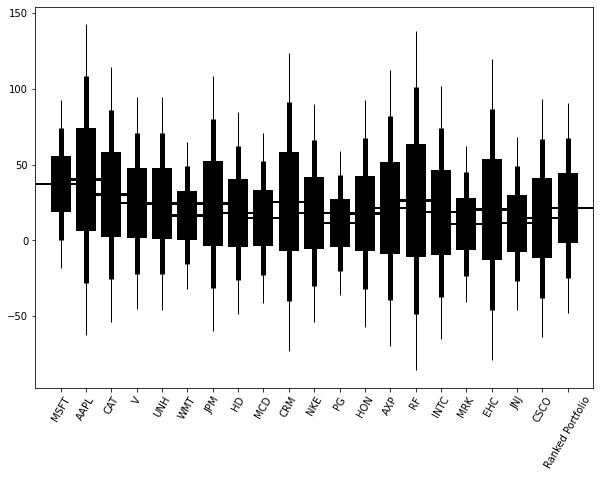

In [13]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

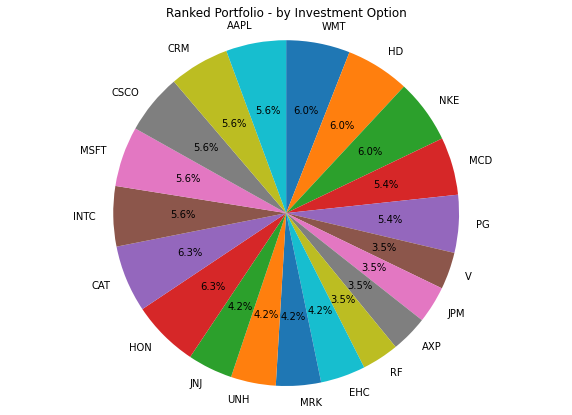

WMT    0.06
HD     0.06
NKE    0.06
MCD    0.05
PG     0.05
V      0.03
JPM    0.03
AXP    0.03
RF     0.03
EHC    0.04
MRK    0.04
UNH    0.04
JNJ    0.04
HON    0.06
CAT    0.06
INTC   0.06
MSFT   0.06
CSCO   0.06
CRM    0.06
AAPL   0.06



In [14]:
# Show pie charts of investment and asset class weights
bb.show_pie_charts(df, portfolio_option, charts=['Investment Option'])

In [15]:
# Show exact weights
bb.print_portfolio(portfolio_option)

Ranked Portfolio Weights:
    MSFT                           0.0562
    AAPL                           0.0562
    CAT                            0.0626
    V                              0.0346
    UNH                            0.0420
    WMT                            0.0597
    JPM                            0.0346
    HD                             0.0597
    MCD                            0.0540
    CRM                            0.0562
    NKE                            0.0597
    PG                             0.0540
    HON                            0.0626
    AXP                            0.0346
    RF                             0.0346
    INTC                           0.0562
    MRK                            0.0420
    EHC                            0.0420
    JNJ                            0.0420
    CSCO                           0.0562


### Optimize Portfolio

In [16]:
# Run_portfolio_optimizer = True will run portfolio optimizer after portfolio analysis is complete
run_portfolio_optimizer = True

In [17]:
# Optimize sharpe ratio while specifying Annual Rate, Worst Typical Down Year,
# and Black Swan.  Setting a constraint to None optimizes absolute Sharpe Ratio
# without regard to that constraint.

'''
constraints = {
    'Annual Return': 12,
    'Worst Typical Down Year': -5,
    'Black Swan': -20
}
'''

constraints = {
    'Annual Return': 8,
    'Worst Typical Down Year': None,
    'Black Swan': -40
}

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, constraints)

Running optimizer.

Ranked Portfolio Metrics:           
    max_sharpe_ratio            1.06
    annual_return              21.13
    std_dev                    20.01
    worst typical down year   -18.90
    black_swan                -38.92


Ranked Portfolio Weights:
    MSFT                           0.1200
    AAPL                           0.0600
    CAT                            0.0800
    V                              0.0000
    UNH                            0.0700
    WMT                            0.1100
    JPM                            0.0400
    HD                             0.0500
    MCD                            0.0300
    CRM                            0.0000
    NKE                            0.0900
    PG                             0.1000
    HON                            0.0700
    AXP                            0.0000
    RF                             0.0000
    INTC                           0.0000
    MRK                            0.0700
    EHC         

### Use Sharpe Ratio adjusted weights
Recommend that you also try using Sharpe Ratio adjusted weights and compare those results with the Optimized Portflio.  
It tends to produce a higher Annual Return while keeping the allocations more balanced than the Optimizer.  (See 'Analysis Options' section).